# 1 - Bitcoin: Sentiment Analysis and Stock Prediction

## What is Bitcoin?
"People use different terminologies to define Bitcoin. Some people call it a cryptocurrency, while others use digital currency. Some individuals refer to Bitcoin as a virtual currency. But, all these terms are correct. That's because Bitcoin is digital money. It's a form of electronic cash or money. That means you can't have physical Bitcoins in your pocket. Ideally, Bitcoin resides in computers and mobile devices only.<br>

Bitcoin is one of the pioneer cryptocurrencies to use blockchain technology. Since the introduction of this cryptocurrency in 2009, no hacker has managed to infiltrate it. And this has proven to most investors that it's a safe investment. What's more, the meteoric rise of Bitcoin's value has captured many investors' attention.<br>

Bitcoin has also proven to be a valuable value storage asset. That's why some people compare it with gold. During an economic crisis, Bitcoin has proven its ability to withstand challenges better than fiat money. Thus, you can use this cryptocurrency to store value during a financial crisis" [1].<br>

## The project
In this project, the main point is the importance of Bicoin in the today's world. Particularly, the project is divided in two phase:
* A __sentiment analysis__ of tweets about Bitcoin, to make a comparison between the price and the historical data of the cryptocurrency and the general idea of people about it, taking twitter as mirror of their thoughts.
* A __stock prediction__ using Machine Learning and regression.

# 2 - Sentiment Analysis

## Preparation

To start this first phase of the project, some steps are necessary.<br>

Firstly, obtaining Bitcoin data and visualizing it is a good choice, in order to take a time interval for the analysis. __Investing.com__ and its API will be used to get all the data needed for the project.<br>

In [5]:
import requests

url = "https://investing-cryptocurrency-markets.p.rapidapi.com/coins/search"

querystring = {"string":"bitcoin","time_utc_offset":"28800","lang_ID":"1"}

headers = {
    'x-rapidapi-key': "66081a705amsh4d45e344ba26380p11e931jsn67415eecbe4f",
    'x-rapidapi-host': "investing-cryptocurrency-markets.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [13]:
indexes = []
indexes = response.json()['data']['pairs_attr']
indexes

[{'pair_ID': 945629,
  'search_main_text': 'BTC/USD',
  'search_main_subtext': 'Bitfinex',
  'search_main_longtext': 'BTC/USD',
  'exchange_flag_ci': 241},
 {'pair_ID': 1057391,
  'search_main_text': 'BTC/USD',
  'search_main_subtext': 'Index - Investing.com',
  'search_main_longtext': 'Bitcoin',
  'exchange_flag_ci': 241},
 {'pair_ID': 1055949,
  'search_main_text': 'BMC',
  'search_main_subtext': 'FX Future - ICE',
  'search_main_longtext': 'Bitcoin Futures CME',
  'exchange_flag_ci': 5},
 {'pair_ID': 33,
  'search_main_text': 'BTC/PLN',
  'search_main_subtext': 'BitBay',
  'search_main_longtext': 'BTC/PLN',
  'exchange_flag_ci': 241},
 {'pair_ID': 49800,
  'search_main_text': 'BTC/EUR',
  'search_main_subtext': 'Kraken',
  'search_main_longtext': 'BTC/EUR',
  'exchange_flag_ci': 241},
 {'pair_ID': 940808,
  'search_main_text': 'BTC/KRW',
  'search_main_subtext': 'Bithumb',
  'search_main_longtext': 'BTC/KRW',
  'exchange_flag_ci': 241},
 {'pair_ID': 997700,
  'search_main_text': 'BT

In the list above, it is possible to see some indexes related to Bitcoin. BTC/USD from Investig.com (with ID: 1057391) will be used in the project.<br>

In [13]:
id_BTC = '1057391'
date_from = '03062021'
date_to = '09062021'

url = "https://investing-cryptocurrency-markets.p.rapidapi.com/coins/get-historical-data"

querystring = {"pair_ID":id_BTC,"date_from":date_from,"date_to":date_to,"lang_ID":"1","interval":"day"}

headers = {
    'x-rapidapi-key': "66081a705amsh4d45e344ba26380p11e931jsn67415eecbe4f",
    'x-rapidapi-host': "investing-cryptocurrency-markets.p.rapidapi.com"
    }

response_prices = requests.request("GET", url, headers=headers, params=querystring)

In [14]:
prices = response_prices.json()['data'][0]['screen_data']['data']

In [18]:
prices_list = []
for item in prices:
    a = list(item.values())
    a.pop()
    a.pop()
    a.pop()
    del a[0]
    a1 = []
    for s in a:
        x=list(s)
        x.remove(",")
        s1="".join(x)
        a1.append(s1)
    a1 = list(map(float, a1))
    prices_list.append(a1)
prices_list_1 = prices_list[::-1]

> __Note__ The list has been reversed because the data were ordered from the highest date to the lowest one.<br>

Once all the information are stored in lists, it is a good practise to insert them in matrixes and then in data frames.<br>

In [19]:
import numpy as np
matrix = np.array(prices_list_1)

In [21]:
import pandas as pd
rows = [d.strftime('%d-%m-%Y') for d in pd.date_range('20210603','20210609')]
col=['Price','Open Price','Highest Price','Lowest Price']
data = pd.DataFrame(matrix, columns=col, index=rows)

In [22]:
data

,Price,Open Price,Highest Price,Lowest Price
03-06-2021,39187.3,37555.7,39462.3,37193.6
04-06-2021,36851.3,39191.4,39255.4,35659.9
05-06-2021,35520.0,36841.2,37887.6,34832.0
06-06-2021,35815.4,35518.7,36434.0,35265.3
07-06-2021,33578.0,35815.4,36754.6,33410.1
08-06-2021,33382.9,33574.6,34047.8,31158.1
09-06-2021,37332.2,33385.5,37517.6,32428.6


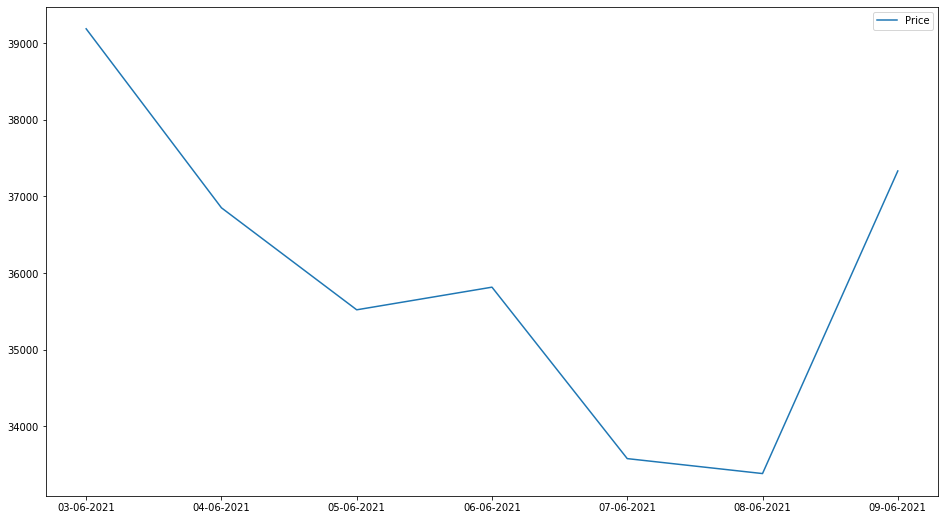

In [71]:
data.plot(figsize=(16,9), y="Price")

The preparation step is done, since the performances of Bitcoin between 03 June and 09 June have been visualized.<br>

## Import Tweets
The next step is importing tweets about bitcoin.<br>

In [24]:
from TwitterAPI import TwitterAPI
api = TwitterAPI('GQ7ny8Zo2Pa7B1ukVOPPrN0Yl', 'V66iB79Cr9QXCjs9oxLzO9U7QfrfUl5XSKKo72alCTdya10Icg',
                 '1398200019648397314-TmKXlyEp3lkkN7hmyMlA4MVRvm1w2h', 'SaSkeUgmEoBXNZCc7Sk03thusBGbXvfPtNFTCJIyi1Bve')

In [42]:
tweets = {}
first_day = 3 # 3 June
last_day = 10 # 9 June
x = 0
for i in range(first_day, last_day):
    j = i + 1
    r = api.request('search/tweets', {'q':'%23bitcoin', 'count':100, 'since':'2021-06-0'+str(i), 'until':'2021-06-0'+str(j), 'lang':'en'})
    tweets[x] = r.json()['statuses']
    x = x + 1

> __Note__ This process will take a few seconds.<br>

Now, the list ``tweets`` contain 6 entries, each one referring the tweets posted a specific day about bitcoin. For instance, below all the tweet creation date about tweets posted on 5 June:<br>

In [47]:
for value in tweets[2]:
    print(value['created_at'])

Sat Jun 05 23:59:59 +0000 2021
Sat Jun 05 23:59:59 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:58 +0000 2021
Sat Jun 05 23:59:57 +0000 2021
Sat Jun 05 23:59:57 +0000 2021
Sat Jun 05 23:59:57 +0000 2021
Sat Jun 05 23:59:56 +0000 2021
Sat Jun 05 23:59:56 +0000 2021
Sat Jun 05 23:59:55 +0000 2021
Sat Jun 05 23:59:55 +0000 2021
Sat Jun 05 23:59:55 +0000 2021
Sat Jun 05 23:59:55 +0000 2021
Sat Jun 05 23:59:55 +0000 2021
Sat Jun 05 23:59:55 +0000 2021
Sat Jun 05 23:59:54 +0000 2021
Sat Jun 05 23:59:54 +0000 2021
Sat Jun 05 23:59:54 +0000 2021
Sat Jun 05 23:59:53 +0000 2021
Sat Jun 05 23:59:53 +0000 2021
Sat Jun 05 23:59:52 +0000 2021
Sat Jun 05 23:59:51 +0000 2021
Sat Jun 05 23:59:51 +0000 2021
Sat Jun 05 23:59:50 +0000 2021
Sat Jun 05 23:59:50 +0000 2021
Sat Jun 05 23:59:50 +0000 2021
Sat Jun 05 23:59:50 +0000 2021
Sat Jun 

## Sentiment Analysis
Once the tweets have been imported and placed in ``tweets``, the sentiment step can begin.<br>

Since the sentiment analysis of the tweets will be done on thei texts, it is a good practise to create a dictionary where, for each key (day), there is a list of tweet texts.<br>

In [48]:
texts = dict()
texts['Day 1']=[]
texts['Day 2']=[]
texts['Day 3']=[]
texts['Day 4']=[]
texts['Day 5']=[]
texts['Day 6']=[]
texts['Day 7']=[]
x = 1
for i in range(0, 7):
    list_of_texts = []
    for tweet in tweets[i]:
        list_of_texts.append(tweet['text'])
    day = 'Day '+str(x)
    texts[day]=list_of_texts
    x = x + 1

Now the VADER procedure will begin. Firstly, it is necessary to download the VADER lexicon.<br>

In [267]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Miko\AppData\Roaming\nltk_data...


True

Next, it will be used a method to evaluate the sentiment according to the measurement: negative, positive and neutral. Then, a dictionary will be created. For each key (day), a list of sentiment object corresponds.<br>

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [49]:
sentiments = dict()
sentiments['Day 1']=[]
sentiments['Day 2']=[]
sentiments['Day 3']=[]
sentiments['Day 4']=[]
sentiments['Day 5']=[]
sentiments['Day 6']=[]
sentiments['Day 7']=[]
x = 1
for i in range(1, 8):
    list_of_sentiments = []
    for text in texts['Day '+str(i)]:
        list_of_sentiments.append(sid.polarity_scores(text))
    day = 'Day '+str(x)
    sentiments[day]=list_of_sentiments
    x = x + 1

For example, let's take the sentiment of the 97th tweet of the day 7 inside the new dictionary (that will be compared with the value calculated directly without the dictionary to show that all the values are placed correctly within the sentiment dictionary).<br>

In [54]:
print(sentiments['Day 7'][97], sid.polarity_scores(texts['Day 7'][97]))

{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732} {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}


In [55]:
list(sid.polarity_scores(texts['Day 7'][97]).values())

[0.0, 0.704, 0.296, 0.2732]

To simplify the subsequent calculations, it is a good choice to create a copy of the previous dictionary changing each object referring to the sentiment with a list.<br>

In [56]:
sentiments2 = dict()
sentiments2['Day 1']=[]
sentiments2['Day 2']=[]
sentiments2['Day 3']=[]
sentiments2['Day 4']=[]
sentiments2['Day 5']=[]
sentiments2['Day 6']=[]
sentiments2['Day 7']=[]
x = 1
for item in sentiments.values():
    list_of_sentiments2 = []
    for s in item:
        v = list(s.values())
        list_of_sentiments2.append(v)
    day = 'Day '+str(x)
    sentiments2[day]=list_of_sentiments2
    x = x + 1

Below a check if the new dictionary value matches the old dictionary value.<br>

In [58]:
print(sentiments2['Day 7'][65], sentiments['Day 7'][65])

[0.0, 0.633, 0.367, 0.8511] {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.8511}


Then, a new matrix will be created: for each row (day), it will have an average measurements of the sentiments (neg, pos, neu) of the tweets of that day.<br>

In [59]:
final_matrix = np.array([np.array(sentiments2['Day 1']).mean(0), np.array(sentiments2['Day 2']).mean(0), np.array(sentiments2['Day 3']).mean(0), np.array(sentiments2['Day 4']).mean(0), np.array(sentiments2['Day 5']).mean(0), np.array(sentiments2['Day 6']).mean(0), np.array(sentiments2['Day 7']).mean(0)])

In [60]:
final_matrix

array([[0.01965 , 0.91223 , 0.06812 , 0.126507],
       [0.02055 , 0.90473 , 0.07472 , 0.132749],
       [0.02807 , 0.86165 , 0.11023 , 0.169029],
       [0.02821 , 0.90652 , 0.06525 , 0.098777],
       [0.01366 , 0.92366 , 0.06268 , 0.127173],
       [0.03631 , 0.8739  , 0.0898  , 0.137369],
       [0.00856 , 0.86256 , 0.12888 , 0.220869]])

In [66]:
import pandas as pd
rows = [d.strftime('%d-%m-%Y') for d in pd.date_range('20210603','20210609')]
col=['Negatives','Neutrals','Positives','Compound']
sentiment_frame = pd.DataFrame(final_matrix, columns=col, index=rows)

In [67]:
sentiment_frame

,Negatives,Neutrals,Positives,Compound
03-06-2021,0.01965,0.91223,0.06812,0.126507
04-06-2021,0.02055,0.90473,0.07472,0.132749
05-06-2021,0.02807,0.86165,0.11023,0.169029
06-06-2021,0.02821,0.90652,0.06525,0.098777
07-06-2021,0.01366,0.92366,0.06268,0.127173
08-06-2021,0.03631,0.87390,0.08980,0.137369
09-06-2021,0.00856,0.86256,0.12888,0.220869


## Comparison
Now that a view of the sentiment of the tweets posted within 6 days and the actual Bitcoin price are ready and evaluated, it is possible to compare the two indexes. <br>

In [68]:
data

,Price,Open Price,Highest Price,Lowest Price
03-06-2021,39187.3,37555.7,39462.3,37193.6
04-06-2021,36851.3,39191.4,39255.4,35659.9
05-06-2021,35520.0,36841.2,37887.6,34832.0
06-06-2021,35815.4,35518.7,36434.0,35265.3
07-06-2021,33578.0,35815.4,36754.6,33410.1
08-06-2021,33382.9,33574.6,34047.8,31158.1
09-06-2021,37332.2,33385.5,37517.6,32428.6


In [70]:
sentiment_frame

,Negatives,Neutrals,Positives,Compound
03-06-2021,0.01965,0.91223,0.06812,0.126507
04-06-2021,0.02055,0.90473,0.07472,0.132749
05-06-2021,0.02807,0.86165,0.11023,0.169029
06-06-2021,0.02821,0.90652,0.06525,0.098777
07-06-2021,0.01366,0.92366,0.06268,0.127173
08-06-2021,0.03631,0.87390,0.08980,0.137369
09-06-2021,0.00856,0.86256,0.12888,0.220869


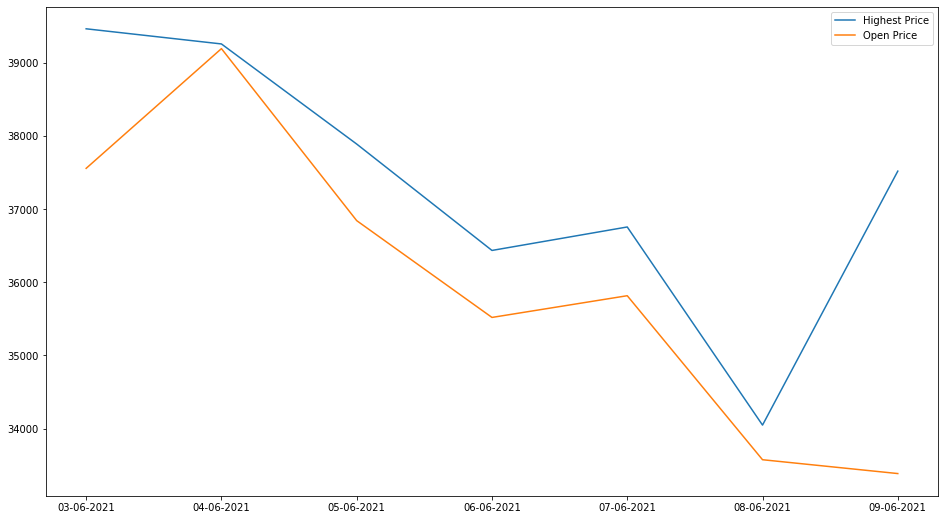

In [74]:
data.plot(figsize=(16,9), y=["Highest Price", 'Open Price'])

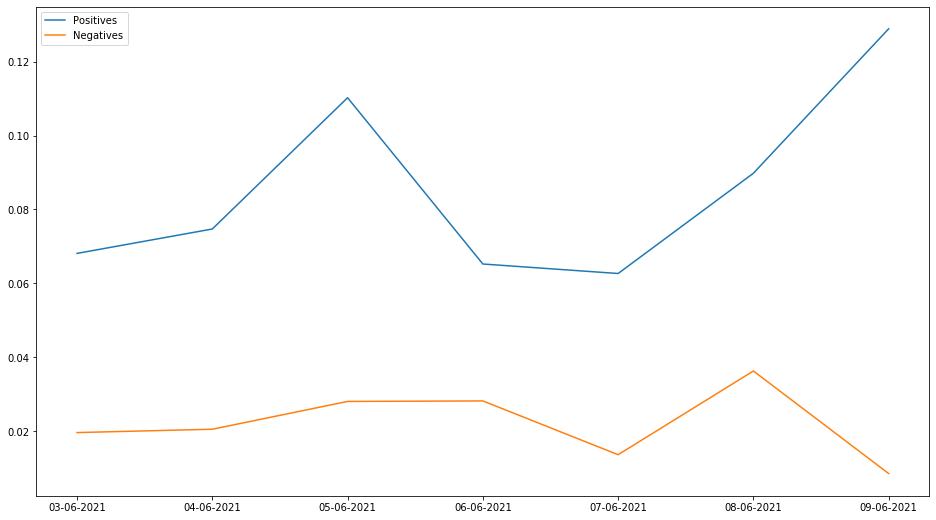

In [75]:
sentiment_frame.plot(figsize=(16,9), y=["Positives", 'Negatives'])

From the comparison the first thing that is possible to see is the correlation between the sentiment of the tweets and the actual value of Bitcoin.<br>

Looking at the sentiment, on 5 June the sentiment of the tweets had a high positive trend, and it is possible to say that it affected the Bitcoin price, since during the day 6 June its price began slightly to rise.<br>

> __Note__ It is possible to assume that if people are positive about Bitcoin, they tend to buy stocks, and as a result the price increases (not instantanelly, but around a few days).

For the same concept, on 6 June the positive sentiment of the tweets dicreased, affecting the Bitcoin price, which on 7 June started to drop dramatically. Again, while on 7 June the positive sentiment started to rise again, this brought an huge raise in Bitcoin price on 8 June.<br>

This close the sentiment analysis phase of the project, showing that analyizing tweets, and particularly knowing the people current idea about Bitcoin can give good statistics about Bitcoin Price and how the market reacts.<br>

> __Note__ Obviously, the analysis would have been much more performing if more data and a bigger time interval were used. But for reasons connected with the twitter developing platform, this is not possible.<br>

> __Note__ For the same reason, if the project is looked after some days, it is necessary to change some values, such as the time range when the tweets are collected in, and so on.

<br><br>
# 3 - Regression
The second phase of the project is a regression that aim to evaluate a prediction of the Bitcoin price.<br>
## Preparation
To start this first phase of the project, some steps are necessary.<br>

As the sentiment analysis phase, obtaining Bitcoin data and visualizing it is a good choice, in order to take a time interval for the analysis. __Investing.com__ and its API will be again used to get all the data needed for the project.<br>

In [51]:
import requests
id_BTC = '1057391'
date_from = '01062020'
date_to = '31052021'

url = "https://investing-cryptocurrency-markets.p.rapidapi.com/coins/get-historical-data"

querystring = {"pair_ID":id_BTC,"date_from":date_from,"date_to":date_to,"lang_ID":"1","interval":"day"}

headers = {
    'x-rapidapi-key': "66081a705amsh4d45e344ba26380p11e931jsn67415eecbe4f",
    'x-rapidapi-host': "investing-cryptocurrency-markets.p.rapidapi.com"
    }

response_prices = requests.request("GET", url, headers=headers, params=querystring)

In [52]:
prices = response_prices.json()['data'][0]['screen_data']['data']

In [53]:
prices_list = []
for item in prices:
    a = list(item.values())
    a.pop()
    a.pop()
    a.pop()
    del a[0]
    a1 = []
    for s in a:
        x=list(s)
        x.remove(",")
        s1="".join(x)
        a1.append(s1)
    a1 = list(map(float, a1))
    prices_list.append(a1)
prices_list_1 = prices_list[::-1]

> __Note__ The list has been reversed because the data were ordered from the highest date to the lowest one.<br>

Once all the information are stored in lists, it is a good practise to insert them in matrixes and then in data frames.<br>

In [54]:
import numpy as np
matrix = np.array(prices_list_1)

In [55]:
import pandas as pd
rows = [d.strftime('%Y-%m-%d') for d in pd.date_range('20200601','20210531')]
col=['Price','Open Price','Highest Price','Lowest Price']
data_big = pd.DataFrame(matrix, columns=col, index=rows)

In [56]:
data_big

,Price,Open Price,Highest Price,Lowest Price
2020-06-01,10189.3,9454.5,10301.8,9429.7
2020-06-02,9527.6,10190.7,10207.3,9347.3
2020-06-03,9667.2,9527.0,9667.2,9421.7
2020-06-04,9794.4,9667.2,9864.4,9490.9
2020-06-05,9631.2,9794.0,9846.1,9628.7
...,...,...,...,...
2021-05-27,38417.3,39249.0,40322.2,37190.8
2021-05-28,35662.5,38543.2,38844.1,34772.4
2021-05-29,34584.6,35664.5,37227.1,33664.2
2021-05-30,35652.8,34589.3,36388.6,33441.0


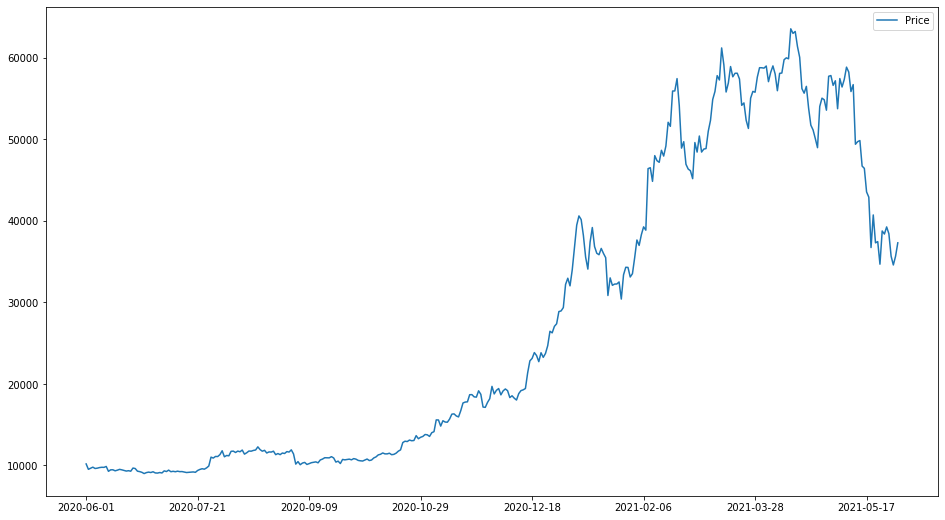

In [57]:
data_big.plot(figsize=(16,9), y="Price")

Price is the closing price of the title at the end of the working day, amd only this value among the 4 values will be used for the prediction.<br>

It is a good practise to create another data frame containing only 2 columns: one for the data and one for the closing price.<br>

In [58]:
data_small = pd.DataFrame(index=range(0,len(data_big)),columns=['Date', 'Close'])

for i in range(0,len(data_big)):
    data_small['Date'][i] = rows[i]
    data_small['Close'][i] = data_big['Price'][i]

In [59]:
data_small

,Date,Close
0,2020-06-01,10189.3
1,2020-06-02,9527.6
2,2020-06-03,9667.2
3,2020-06-04,9794.4
4,2020-06-05,9631.2
...,...,...
360,2021-05-27,38417.3
361,2021-05-28,35662.5
362,2021-05-29,34584.6
363,2021-05-30,35652.8


To represent data in a better way, it is a good practise to obtain a set of features that can be helpful in predicting stock price. <br>

In [60]:
from fastai.tabular import  add_datepart

data_features = pd.DataFrame(index=range(0,len(data_small)),columns=['Date', 'Close'])

for i in range(0,len(data_small)):
    data_features['Date'][i] = data_small['Date'][i]
    data_features['Close'][i] = data_small['Close'][i]
add_datepart(data_features, 'Date')
data_features.drop('Elapsed', axis=1, inplace=True)

In [61]:
data_features

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,10189.3,2020,6,23,1,0,153,False,True,False,False,False,False
1,9527.6,2020,6,23,2,1,154,False,False,False,False,False,False
2,9667.2,2020,6,23,3,2,155,False,False,False,False,False,False
3,9794.4,2020,6,23,4,3,156,False,False,False,False,False,False
4,9631.2,2020,6,23,5,4,157,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,38417.3,2021,5,21,27,3,147,False,False,False,False,False,False
361,35662.5,2021,5,21,28,4,148,False,False,False,False,False,False
362,34584.6,2021,5,21,29,5,149,False,False,False,False,False,False
363,35652.8,2021,5,21,30,6,150,False,False,False,False,False,False


Now splitting the data set is necessary to proceed through the prediction.<br>

> __Note__ While splitting the data into train and validation set, it is not possible to use random splitting since that will destroy the time component. So, here the last 2 months’s data were placed into test set and the 10 months’s data before that into training set.

In [62]:
training = data_features[:304]
test = data_features[304:]

The final step of the preparation is divide the two sets in labels and features.<br>

In [63]:
x_training = training.drop('Close', axis=1)
y_training = training['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

## Regression procedure

To fit a linear regressor to the data, we have to use the LinearRegression object of scikit-learn.<br>

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_training,y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The fit method is used to tune the parameters of the regressor. In this case, it is used to provide (and memorize) the training set. We need also to provide both the input features and the corresponding labels.<br>

A good practise is to calculate the RMSE. This performance measure is actually an error measure. A good regressor will obtain a small error. It is the sum of the distances between the predicted value and the actual value.<br>

In [65]:
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

11480.946368776813

To better see the prediction, it is necessary to plot it.<br>

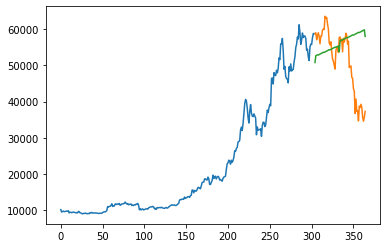

In [69]:
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
test2 = test
training2 = training
test2['Predictions'] = 0
test2['Predictions'] = preds


test2.index = data_features[304:].index
training2.index = data_features[:304].index

plt.plot(training2['Close'])
plt.plot(test2[['Close', 'Predictions']])

As it is possible to see, the linear regression performed poorly. It only had a slighly nice result in predicting the small and sharp trend inversion. Except it, the trends go in different directions.<br>

Obviously, the prediction of Bitcoin prices are affected by several factors, and not only by his historical data. In fact, it is possible to understand this side of the analysis by doing Fundamental Analysis, analyzing the company’s future profitability on the basis of its current business environment and financial performance. Of course the work of this project lies only on Technical Analysis, using a statistical approach.<br>

## References
[1] https://ftnnews.com/technology/41451-why-is-bitcoin-so-important-and-should-you-care. Accessed on 09 June 2021.